In [1]:
import random

import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [2]:
# Data from: https://huggingface.co/datasets/wider_face
# unzip files into 'data' folder

data_dir            = 'data'

training_img_dir    = '/WIDER_train/images/'
test_img_dir        = '/WIDER_test/images/'
validation_img_dir  = '/WIDER_val/images/'

label_dir           = '/wider_face_split'
training_img_label  = '/wider_face_train_bbx_gt.txt'
val_img_label       = '/wider_face_val_bbx_gt.txt'

# Data Processing

In [3]:
training_data = []

with open(data_dir + label_dir + training_img_label) as t:
    line = t.readline().strip('\n')
    num_img, max_img = 0, 100

    while line:
        if 'jpg' in line:
            num_img += 1
            if num_img > max_img:
                num_img -= 1
                break

            # If we need anything beyond bbx and img from data, 
            # uncomment the commented dictionary and data parsing bits below
            training_data.append({
                'img': cv2.cvtColor(cv2.imread(data_dir + training_img_dir + line), cv2.COLOR_BGR2RGB),
                'bbx': [],
                # 'blur': [],
                # 'expression': [],
                # 'illumination': [],
                # 'occulsion': [],
                # 'pose': [],
                # 'invalid': []
            })

        else:
            if line.isnumeric(): # number of face bbx
                line = t.readline().strip('\n')
                continue
            else:
                face_data = line.split(' ')
                training_data[-1]['bbx'].append([int(coord) for coord in face_data[:4]])
                # training_data[-1]['blur'].append(int(face_data[4]))
                # training_data[-1]['expression'].append(int(face_data[5]))
                # training_data[-1]['illumination'].append(int(face_data[6]))
                # training_data[-1]['occulsion'].append(int(face_data[7]))
                # training_data[-1]['pose'].append(int(face_data[8]))
                # training_data[-1]['invalid'].append(not bool(face_data[9]))
        line = t.readline().strip('\n')


# Face Detection

In [4]:
haar_cascade = '/haarcascade_frontalface_default.xml'
face_detection = cv2.CascadeClassifier(f'{data_dir}/{haar_cascade}')

# BBX Detection vs BBX Ground Truth

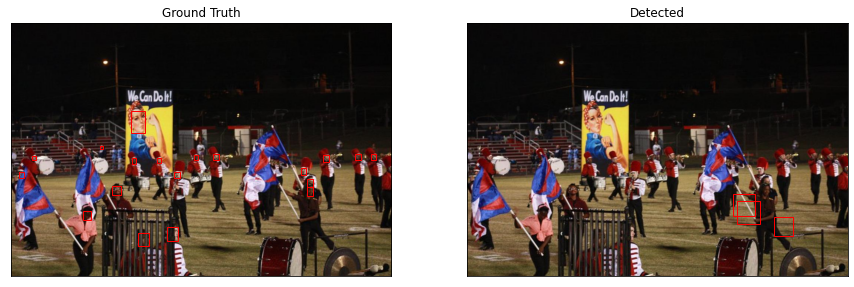

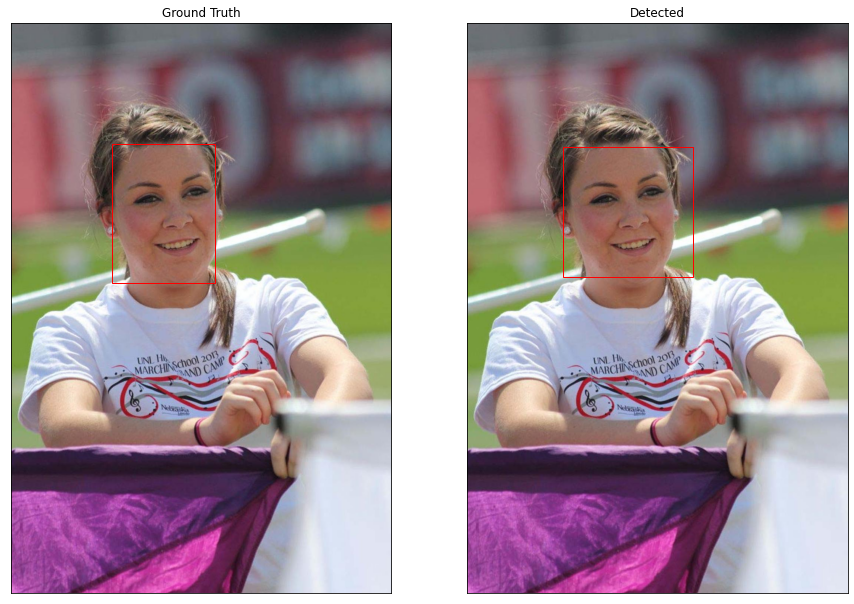

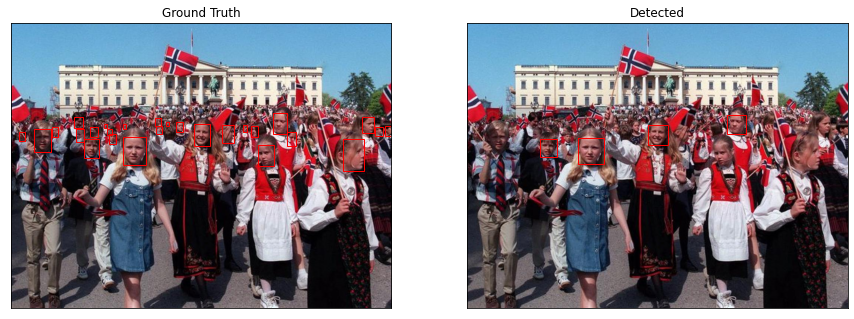

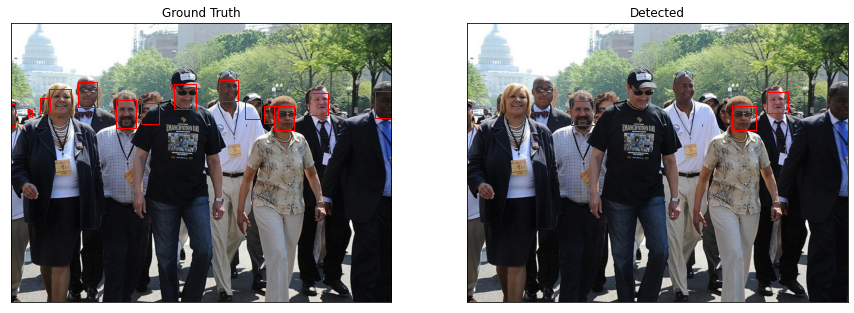

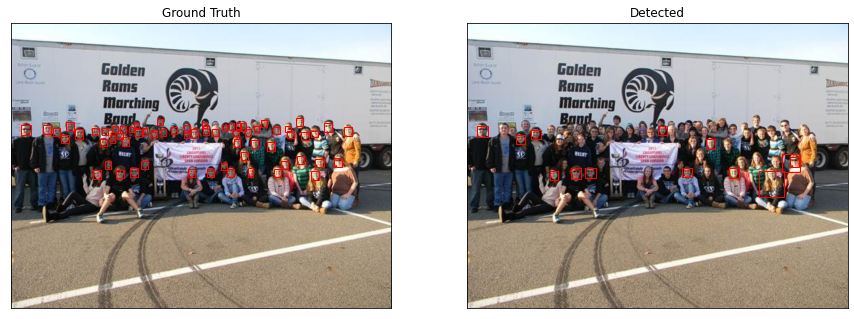

In [17]:
for i in np.random.randint(0, num_img, 5):
    fig, ax = plt.subplots(1, 2, figsize=(15,17))

    ax[0].imshow(training_data[i]['img'])
    ax[0].set_title('Ground Truth'), ax[0].set_xticks([]), ax[0].set_yticks([])
    ax[1].imshow(training_data[i]['img'])
    ax[1].set_title('Detected'), ax[1].set_xticks([]), ax[1].set_yticks([])

    # grayscaled image detection using haar cascade 'pretrained' model
    grayed = cv2.cvtColor(training_data[i]['img'], cv2.COLOR_RGB2GRAY).astype(np.uint8)
    detected_bbx = face_detection.detectMultiScale(grayed, 1.2, 3)

    for bbx in training_data[i]['bbx']:
        a, b, width, height = bbx
        rect = patches.Rectangle((a, b), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax[0].add_patch(rect)

    for bbx in detected_bbx:
        a, b, width, height = bbx
        rect = patches.Rectangle((a, b), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax[1].add_patch(rect)

    plt.show()